<a href="https://colab.research.google.com/github/dahmed301/POST_API/blob/main/CW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TELCO CUSTOMER CHURN DATASET: Exploratory Data Analysis & Classification using several Machine Learning Algorithms**

##**Objective**
This notebook investigates the Telco Customer Churn dataset which was originally published on the IBM Community. The objective is to perform EDA on the dataset and define a Machine Learning task with the use of Classification algorithms, to build models and evaluate their performances against relevant metrics.

##**Introduction**
Customer churn, according to Amaresan (2021), is the percentage of customers who stop using a company's product or service during a given time frame. This time frame can be a fiscal quarter or a year, depending upon the type of business. Ideally, companies and businesses want to always retain their customers, which refers to a 0% churn rate, but that is not always the case. However, looking at customer data for a particular service or product is a good way to find out why customers tend to leave and how these factors can be used to predict whether current customers leave or stay. It can also help in identifying areas of improvement for the company to retain more customers and even attract new ones.

The Telco Customer Churn dataset contains information about a fictional telecom company in California, USA that provides internet and phone services to almost 7000 customers in a certain time frame. The dataset story is listed below:

* CustomerId: Customer ID
* Gender: Gender
  SeniorCitizen: Whether the customer is a senior citizen (1, 0)
* Partner: Whether the client has a partner (Yes, No) - Indicates if the customer is married or not
* Dependents: Whether the client has dependents (Yes, No) - Indicates if the customer has children, parents, grandparents, etc.
* Tenure: Number of months the customer has stayed with the company
* PhoneService: Whether the customer uses phone service (Yes, No)
* MultipleLines: Whether the customer has more than one line (Yes, No, No phone service)
* InternetService: The type of internet service used by Customer (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security (Yes, No, No Internet service)
* OnlineBackup: Whether the customer has online backup (Yes, No, No Internet service)
* DeviceProtection: Whether the customer has device protection (Yes, No, No Internet service)
* TechSupport: Whether the customer receives technical support (Yes, No, No Internet service)
* StreamingTV: Indicates whether the customer has streaming TV (Yes, No, No Internet service)
* StreamingMovies: Whether the customer has streaming movies (Yes, No, No Internet service)
* Contract: Duration of the customer's contract (Month to month, One year, Two years)
* PaperlessBilling: Whether the customer receives a paperless bill (Yes, No)
* PaymentMethod: Customer's payment method (Electronic check, Postal check, Bank transfer, Credit card)
* MonthlyCharges: Amount charged to the customer monthly
* TotalCharges: Total amount charged to the customer
* Churn: Whether the customer left (Yes or No)

##**Machine Learning Task**
Machine Learning is a branch of Artificial Intelligence (AI) which uses statistical methods to train algorithms. Brown (2021) states that Machine Learning (ML) systems can be descriptive (what happened), predictive (what will happen) or prescriptive (what action to take). There are two types of learning models: supervised & unsupervised. Supervised learning models are trained on labelled data and can be used to make predictions while unsupervised models find patterns in unlabelled data (Brown, 2021).

Classification is a supervised machine learning task that is used to assign and predict class labels (Brownlee, 2020). Given a dataset, an algorithm is trained to build a model which is then used to predict categorical data (class labels). Brownlee (2020) claims that classification tasks can be of different types such binary, multilabel or multiclass etc.


**Problem Definition:**

For our dataset, we want to predict customer churn for existing and new customers, which is a binary class label. Therefore, our Machine Learning task is a Binary Classification problem which predicts whether a customer stays or leaves the company based on predictor variables.

**Methodology:**

To achieve this, various classifier algorithms will be trained and tested using the variables explained above. The notebook elaborates the steps taken to ingest, clean, transform and pre-process the data before splitting it into training and testing sets. These sets are then used to build the required classification models and test their validity and accuracy in predicting the target variable (customer churn). Based on these performance metrics, the best model is selected, and its hyper-parameters are tuned to improve the accuracy of prediction. Once this model is trained, tested, and validated, it is then ready to be used on new data to predict the customer churn with a certain level of accuracy. So, let’s get started!


##**Importing Libraries & Data Ingestion**
First of all, let's import the necessary libraries and packages which will be used throughout the notebook for different purposes, as commented in the code below.

In [ ]:
#Importing Libraries

##For data cleaning & pre-processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate

##For data visualisations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

##For ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

##For model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Our dataset is provided to us in a .csv file format. This file is stored on the Google Drive which needs to be mounted in order to connect it to this notebook. This will allow us to import the data easily.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now we can import our data using pandas read_csv method and providing the drive path. This data is saved to a pandas DataFrame named df.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')

Let's have a look at the first five rows of the dataframe.

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We can observe that our dataframe is neatly organised as rows and columns where each rows is an observation (sample) and each columns is a variable (feature).

It is also important to know the dimensions of our dataframe.

In [ ]:
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  7043
Number of columns:  21


Next we will have a look at the columns in the data and their data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see that some columns are numerical (2 integer and 1 float) while the rest of the 18 columns are categorical. This is very common with such a dataset which contains data related to customers, services and products.

However, we can notice that the variable "TotalCharges" is shown as categorical whereas it should be a numerical variable. We can convert it to numerical by changing its data type.

In [ ]:
#Converting Total Charges to a numerical variable
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

Let's check the data type of "TotalCharges" again to make sure it has been changed.

In [ ]:
#Making sure that the variable type has changed
df['TotalCharges'].dtype

dtype('float64')

##**Handling Missing Values, Duplicates & Outliers**
One of the first step in the data cleaning process is to check for missing values, duplicates and outliers in our data which can alter the results of any visual or model-based analysis as we dive deeper.

Let's see if our variables have any missing values.

In [ ]:
#Number of missing values in each column
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As expected, there are 11 missing values in the "TotalCharges" column. There are several ways to deal with missing values such as replacing them with mean values of that variable. But in this case, it is decided that the rows containing these missing values will be entirely removed from the data because 'TotalCharges' has a very high magnitude as compared to other numerical variables. Filling these values with unknown estimated values can affect the perfromance of the classification model as it can generate a misleading bias. So, even though it is a loss of valuable data, removing them is a safer option.

In [ ]:
#Dropping missing values
df = df.dropna()

#Checking missing values again to confirm
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now we can check for any duplicate values in our data. Since Customer ID is the unique variable, we can use that to see if there are any repeated rows.

In [ ]:
#Getting duplicate values from the dataframe
duplicates = df['customerID'].duplicated()

#Checking how many duplicate values
print('Number of duplicate values: ', len(df[duplicates]))

Number of duplicate values:  0


Great news! There are no duplicate values. That's one less thing to worry about.

##**Investigating Variables/Features**
In order to effectively select and implement a classification model, we need to understand our variables throughly and how they behave with respect to the target variable i.e. customer churn. This section performs a brief data analysis using some statistics and visualisations to explore the variables.

As discussed earlier, there are 4 numerical variables in the data. Let's have a look at some descriptive statistics of these variables to investigate any outliers.

In [ ]:
#Descriptive stats of numerical variables
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


As observed, the SeniorCitizen variable has a range of 0 to 1, which tells that this is also a categorical variable in the boolean form. But we do not need convert it to True/Flase because we need 0s and 1s to train the ML algorithm. In fact, all the rest of the categorical variables will also be converted to integers using label encoding, but that comes later.

Apart from that, the three main continuous variables seem to have a reasonable spread having mean values relatively close to the 50th percentile (median) values.

* The average monthly charges of the customers are around \$65 and varies between \$18 to \$118
* On average, the customers stay with the company for around around 32 months (over 2.5 years)
* The average amount of total charges paid by the customers is around \$2300 but half of all the customers have paid less than \$1400. This suggests that there are few customers who have paid a large sum, probably because they have stayed longer with the company.

Let's create some boxplots to visualise their spread.

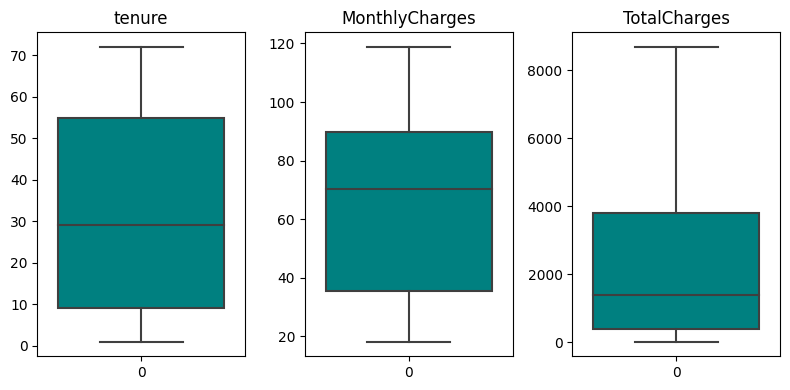

In [ ]:
columns_for_boxplots = ['tenure','MonthlyCharges','TotalCharges']

#Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))

# Iterate through columns and create boxplots
for col, ax in zip(columns_for_boxplots, axes):
    sns.boxplot(df[col], ax=ax, boxprops=dict(facecolor='teal'), showfliers=False)
    ax.set_title(f'{col}')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

By looking at the boxplots we reach the same conclusions that the distribution of Total Charges is positively skewed (right-skewed) having a large portion of values towards the smaller end. This can be confirmed by histogram as well.

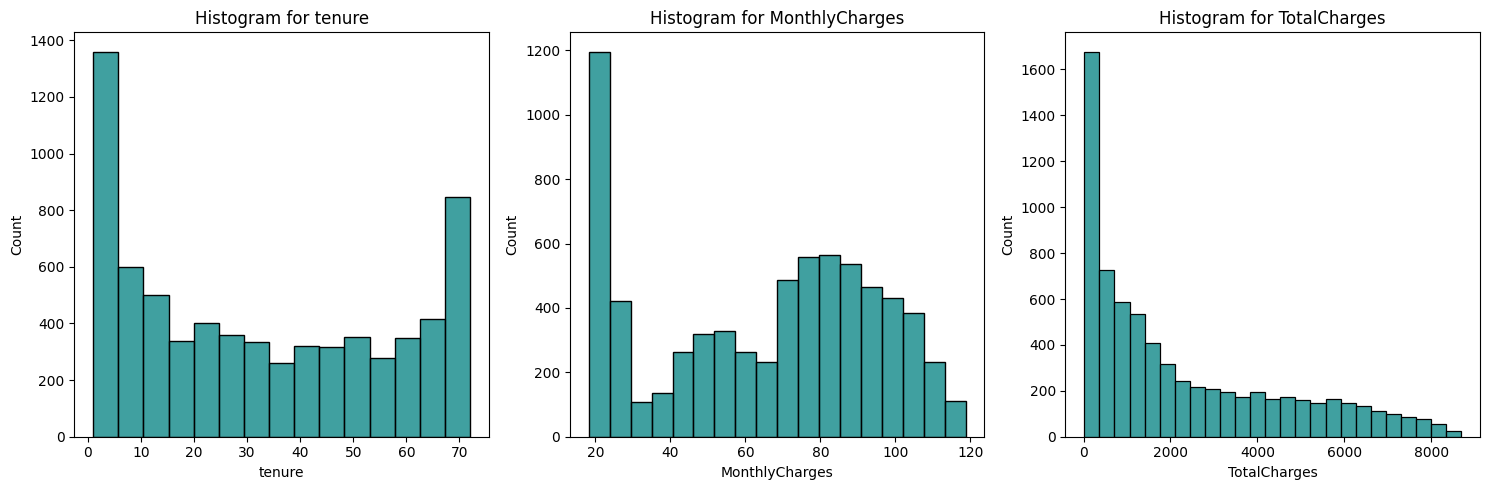

In [ ]:
# Columns for histograms
columns_for_histograms = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Iterate through columns and create histograms
for col, ax in zip(columns_for_histograms, axes):
    sns.histplot(df[col], color='teal', kde=False, ax=ax)
    ax.set_title(f'Histogram for {col}')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

The histogram confirm that Total Charges has a positive skew. That means most of the customers pay a smaller sum in total while few of them pay more. However, there are no outlier in any of the numerical variables that need to be removed.

We can also conclude the following:
* There a lot of new customers who have only been with the company for less than 6 months. This includes current new customers as well as those who left in the first 6 months. There is also a good number of loyal customers who have been there for almost 6 years.
* A large number of customers are using the most basic package which has the least monthly charges. They might only be using one service from the company, hence lower cost.

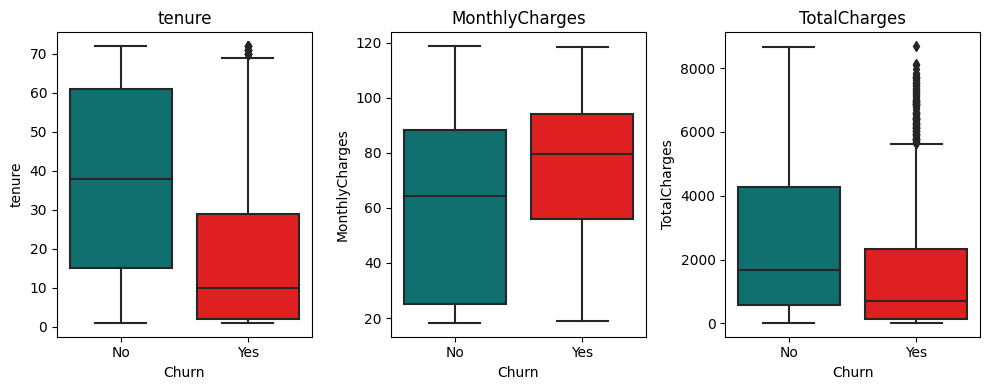

In [ ]:
churn_boxplots = ['tenure','MonthlyCharges','TotalCharges']

#Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

# Iterate through columns and create boxplots
for col,ax in zip(churn_boxplots,axes):
    sns.boxplot(x='Churn', y=col, data=df, ax=ax, palette={'No': 'teal', 'Yes': 'red'})
    ax.set_title(col)
    plt.xlabel('Churn')


# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

The figure above illustrates the relationship of our numerical variables with the Churn variable. We can observe that the customers who are relatievly new with the company and pay higher monthly charges are more likely to leave/churn. For the Total Charges variable, it is somewhat inferable that since customers who leave, don't tend to stay long, hence their total charges are lower than staying customers.

Next, we will have a look at the general distribution of our most important variable - Customer Churn. Beacuse it is a binary variable, based on Yes or No values, it is feasible to create a pie chart for understanding the ratio of customers who leave and stay.

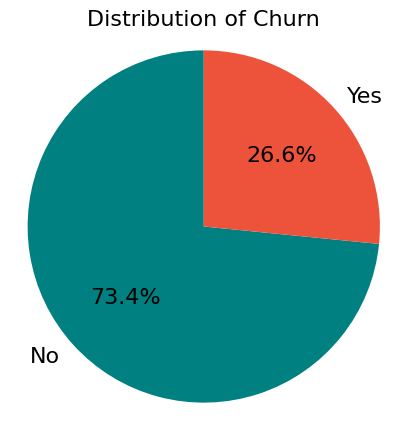

In [ ]:
# Distribution of Customer Churn

# Data to plot
labels = df['Churn'].value_counts().index.to_list()
sizes = df['Churn'].value_counts()

# Colors
colors = ['teal', '#ed533b', 'white']

# Plot
plt.figure(figsize=(5,5))
patches, texts, autotexts = plt.pie(sizes, colors = colors, autopct='%1.1f%%', startangle=90, labels=labels)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(16)
    autotext.set_fontsize(16)

plt.title('Distribution of Churn', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


If we just analyse the churn distribution, it seems that only a quarter of the customers have left the company while three-quarters have stayed. This is not a bad figure. But depending on the sensitivty of the business, companies like to have recurring customers. It would be ideal if the churn percentage was under 10% or even less.

Now let's have a look at the categorical variables and how they react with the churn variable. The following pie charts and bar charts display data pertaining to custmers who have left and what were the services they used, their contract types and payment methods.

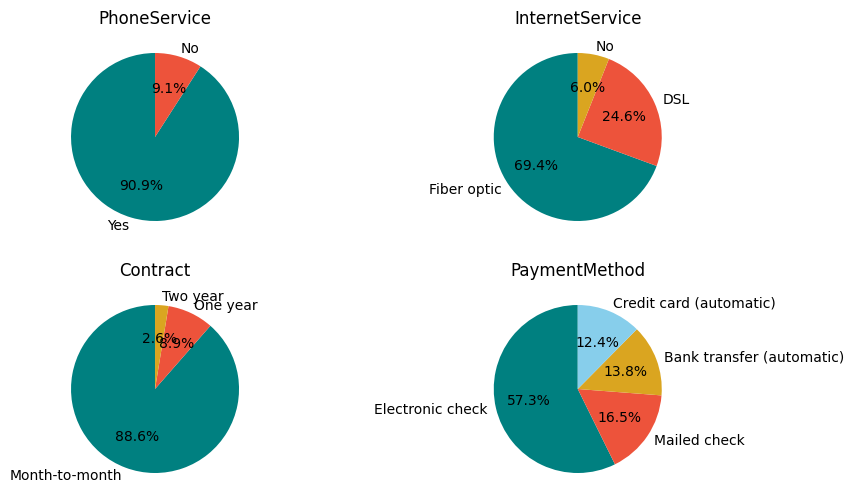

In [ ]:
# Categorical columns
categorical_columns = ['PhoneService', 'InternetService',
                       'Contract', 'PaymentMethod']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
#fig.subplots_adjust(hspace=0.3, wspace=0.5)

# Iterate through categorical columns and create pie charts for 'Churn' == 'Yes'
for col, ax in zip(categorical_columns, axes.flatten()):
    # Data for 'Churn' == 'Yes'
    churn_yes_data = df[df['Churn'] == 'Yes'][col].value_counts()

    # Plotting pie chart
    ax.pie(churn_yes_data, labels=churn_yes_data.index,
           autopct='%1.1f%%', startangle=90,colors=['teal','#ed533b','goldenrod','skyblue'])
    ax.set_title(col)


# Display the plot
plt.show()


Out of those customers who left:
* 91% were using phone service and 94% were using some type of internet service which means most of them were using both internet & phone
* Around 89% were on a monthly contract, which made it easier for them to leave the company
* More than half of them were paying through electronic check, and around a quarter of them paid through automatic methods (card or bank transfer)

Now we will look at some additional internet services used or not used by customer who have left.

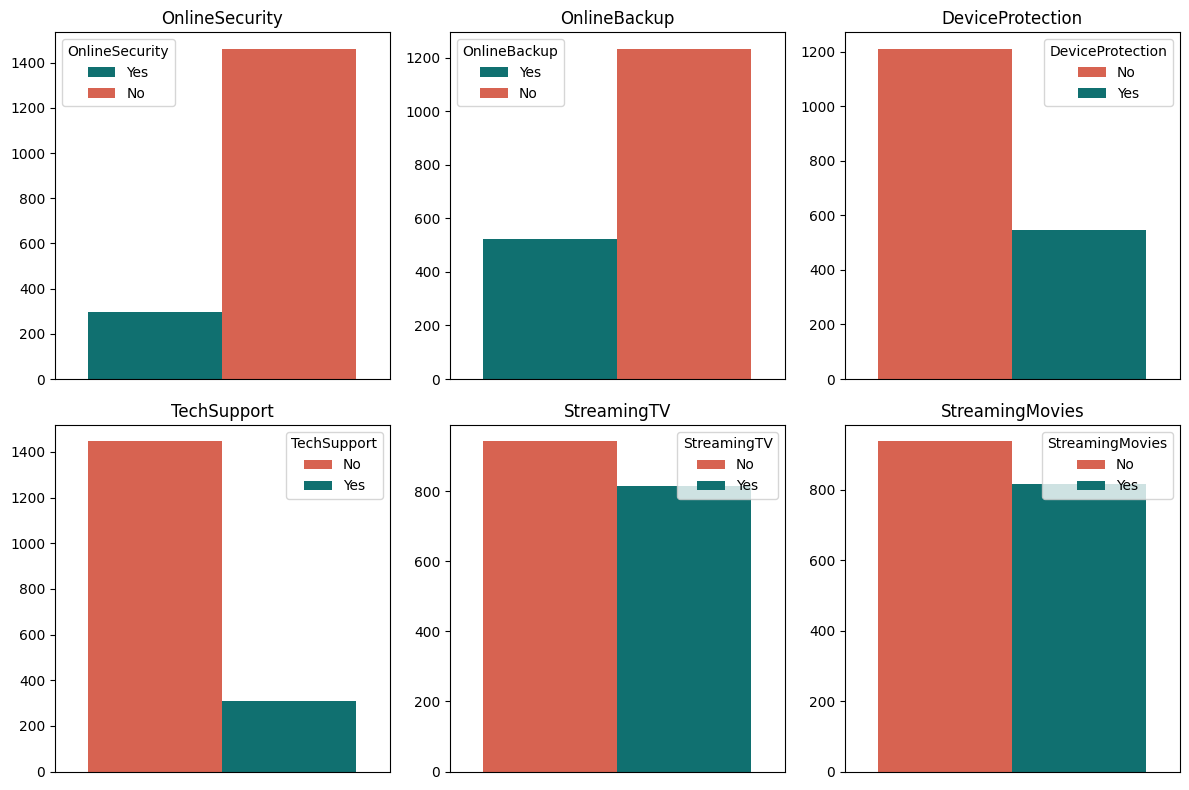

In [ ]:
bar_columns = ['OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through categorical columns and create bar plots
for i, col in enumerate(bar_columns):
    sns.countplot(x='Churn', hue=col,
                  data=df[(df['Churn']=="Yes") &    #filter df where churn is yes
                   (df['InternetService']!="No")],  #and internet service is not No
                  ax=axes[i], palette={'No': '#ed533b', 'Yes': 'teal','No internet service':'goldenrod'})
    axes[i].set_title(col)  # Set subplot title
    axes[i].set_ylabel('')  # Remove y-axis labels
    axes[i].set_xlabel('')  # Remove x-axis labels
    axes[i].set_xticks([])  #Remove x axis

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


The red bar is quite large in all plots. Therefore, it is convenient to say that most of the customers who left were not usually using any of the additional internet backup or support services. However a good number of them were streaming TV & movies from third-party providers. This might mean that they had found a better offer from other providers.

##**Data Preparation & Feature Selection**

Now that we have a good idea of our variables and their relationship with the target variable, we can move forward with data preparation for training and building models so that our data is understandable by the model.

First we will create a copy of our data so that any changes we make from this point onward do not affect the original data. Then we can drop unecessary columns which are not useful for modelling.'Customer ID' is not a variable of interest which can be dropped from our data.

In [ ]:
#Creating a copy of our original dataframe
data = df.copy()

#Dropping unwanted columns
data.drop(['customerID'], axis=1,inplace=True)

Next, we need to convert all the features into numerical data types. The classification algorithms only digest numerical data for training and predicting. This can be done using label encoding. Most of our features are categorical except a few.

Let's have a look at the number of unique values in each feature.

In [ ]:
data.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

Apart from the numerical variables (tenure, total charges and monthly charges), all the rest are categorical variables with 2,3 or 4 unique values, as seen above.

First we will manually binarise our target feature (churn) beacuse we want to assign known values for future reference.

In [ ]:
#Binarise the target variable
data["Churn"] = data["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

Here we have binarised our customer churn variable - a value of 1 has been assigned to 'Yes' while 0 is assigned to 'No'.

Next we can use Label encoding to similarly assign values of 0,1,2 and 3 to all the categories in our features. Then we can have a look at the data to see how it looks.

In [ ]:
#Label Encoding of features
data = data.apply(LabelEncoder().fit_transform)

#show the first 5 rows of the data
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536,1
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,266,3570,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,728,674,1


Note that all the categorical features have been assigned numerical values. However, the continuous features remain the same, which is exactly what we would like.

Now we can separate our target and predictor variables to make it easier to build models around them.

In [ ]:
#Separating target and predictors

##selecting Churn as target variable
target = data['Churn']

##selecting all variables except Churn
predictors = data.drop(['Churn'], axis=1)

Now we find out the correlations of predictors against the target. For this we create a correlation matrix and then visualise it using a heatmap.

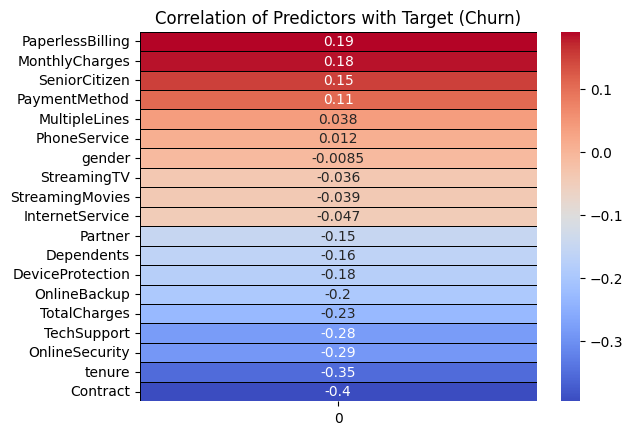

In [ ]:
#creating a correlation matrix
corr = predictors.corrwith(target).sort_values(ascending = False).to_frame()

#generating the correlation heatmap
sns.heatmap(corr, annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black')
plt.title('Correlation of Predictors with Target (Churn)');

We can see that most of the features are not highly correlated with the target. Some features such as Contract and Tenure seem to somewhat correlated to the Churn.

This might not give us the true picture because the features are originally categorical and their correlations with Churn cannot be used as a benchmark. Secondly, correlation can only explain how linear the data is. Our data might not have linear relationship, which is why we need machine learning models to perform classification. These models take all variables into account when mapping the target variable.

Let's define X and y parameters for our models. We need our X and y to be pandas dataframes. 'Predictors' is already a dataframe but we need to convert 'target' from a series to a dataframe.

In [ ]:
#defining X and y parameters for model training
X = predictors
y = target.to_frame()


Next, we will split our x and y data into training and testing sets. The training sets are used to fit the model to our specific data. Later, the testing sets are used to make predictions and compare the results of the model.

In [ ]:
#Splitting data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

##Classification Models: Training, Implementation & Performance Evaluation
Now that our data is ready, we can train and test different algorithms and find out which one performs the best with our specific data. Since our task is a Binary CLassification task, we will use the following popular classification algorithms to compare results:
* Gaussian Naive Bayes
* Decision Tree
* Random Forest
* Logistic Regression

The following list outlines the steps taken for the training, testing and evaluation of the classification models.
* First, we convert our target variable training set (y_train) to a one-dimensional numpy array.
* Then we create a classifier using the particular algorithm from Scikit-learn package and fit the model using the training sets.
* Then this model is used to make prediction for y using the test set of x.
* Then these predictions are compared against the actual test set of y.
* Based on this comparison, we calculate the accuracy of the model and create a confusion matrix.
* The classification report provides the precision, recall and F1 score of the model which are essential metrics for performance evaluation.

Let's understand what the confusion matrix and the relevant scoring metrics actually mean.

<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/8_confusion-matrix-python.jpg" width="500" height="340">

The confusion matrix as shown above compares the actual versus predicted values and checks whether the predictions were correct or not. The key terms are:

**True Positive (TP)**: Instances that are actually positive and are predicted as positive by the model.<br>
**False Positive (FP)**: Instances that are actually negative but are predicted as positive by the model.<br>
**False Negative (FN)**: Instances that are actually positive but are predicted as negative by the model.<br>
**True Negative (TN)**: Instances that are actually negative and are predicted as negative by the model.<br>

Based on these terms, the correlation report calculates the scores as shown below:
* Precision = TP / (TP + FP) <br>
Out of all the positive predictions, how many were actually true <br>

* Recall = TP / (TP + FN) <br>
Out of all the actual true values, how many were correctly predicted by the model <br>

* F1 Score = 2 * (Precision * Recall) / (Precision + Recall) <br>
It is the harmonic mean of the precision and recall

All these metrics are essential in evaluating the performance of a binary classification model where predictions are made on the basis of class labels (True or False). Note that the correlation report will give two sets of scores - one for each class. Recall that 0 means customer staying while 1 means customer leaving.

Let's start applying our models and see which one performs the best.


##**Gaussian Naive Bayes**
Gaussian Naive Bayes is a classification technique based on a probabilistic approach which assumes that each class is normally distributed and each feature has the potential to independently predict the target variable (Martins, 2023). Let's apply this algorithm to our data and see the results.

In [ ]:
#Gaussian Naive Bayes

#converting the y_train to a 1-dimensional numpy array
y_train_flat = y_train.values.ravel()

# Create and train a Gaussian Naive Bayes classifier (Gaussian Naive Bayes)
churn_classifier_GNB = GaussianNB()
churn_classifier_GNB.fit(X_train, y_train_flat)

# Make predictions on the test set
predictions_nb = churn_classifier_GNB.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_true=y_test, y_pred=predictions_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb:.2%}\n')
#Classification Report
print(classification_report(y_test, predictions_nb))

Naive Bayes Accuracy: 76.35%

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1723
           1       0.53      0.72      0.61       598

    accuracy                           0.76      2321
   macro avg       0.71      0.75      0.72      2321
weighted avg       0.80      0.76      0.77      2321



**Discussion:**

The Gaussian Naive Bayes gives an accuracy of around 76%. It predicts the negative class with a precision of 89% while the positive class is predicted with a precision of merely 53%. Since our class labels are not distributed normally, it might not be a good idea to go ahead with this model.

##**Decision Tree & Random Forest**

According to Bento (2021), decision trees are classifier algorithms that uses a set of rules to make decisions just like humans do. Some algorithms are probabilistic  while others are rules-based. Decision Trees keep applying different rules to create leaf nodes untill all the samples are either pure in that node or reach a threshold limit. The depth of the tree is a factor that can be fine-tuned to fit the data better. Unlimited depth can result in overfitting, or small depth can result in underfitting.

Meltzer (2023) says that Random Forest is an algorithm which uses multiple decision trees after dividing the data into several sets. It grows and merges those trees together for a better accuracy. These individual trees are uncorrelated, and each tree provides a classification label. The label with most occurrences is adopted by the model, which altogether improves the accuracy.

Let's train and apply both the models - first we will use an individual decision tree and then the Random Forest and see the results.

In [ ]:
#Decision Tree

# Ensure y_train is a 1D array using values and ravel()
y_train_flat = y_train.values.ravel()
# Create and train a Decision Tree classifier
churn_classifier_dt = DecisionTreeClassifier(max_leaf_nodes=100, random_state=0)
churn_classifier_dt.fit(X_train, y_train_flat)
# Make predictions on the test set
predictions_dt = churn_classifier_dt.predict(X_test)
# Calculate accuracy
accuracy_dt = accuracy_score(y_true=y_test, y_pred=predictions_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2%}\n')
#Classification Report
print(classification_report(y_test, predictions_dt))

Decision Tree Accuracy: 77.94%

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1723
           1       0.58      0.52      0.55       598

    accuracy                           0.78      2321
   macro avg       0.71      0.69      0.70      2321
weighted avg       0.77      0.78      0.78      2321



The random forest model is using 100 trees for classification (n_estimators set to 100).

In [ ]:
#Random Forest

# Ensure y_train is a 1D array using values and ravel()
y_train_flat = y_train.values.ravel()
# Create and train a Random Forest classifier
churn_classifier_rf = RandomForestClassifier(n_estimators=100, random_state=0)
churn_classifier_rf.fit(X_train, y_train_flat)
# Make predictions on the test set
predictions_rf = churn_classifier_rf.predict(X_test)
# Calculate accuracy
accuracy_rf = accuracy_score(y_true=y_test, y_pred=predictions_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2%}\n')
#Classification Report
print(classification_report(y_test, predictions_rf))

Random Forest Accuracy: 79.97%

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1723
           1       0.64      0.50      0.56       598

    accuracy                           0.80      2321
   macro avg       0.74      0.70      0.72      2321
weighted avg       0.79      0.80      0.79      2321



**Discussion:**

We can see from the results that both Decision Tree and Random Forest give an accuracy of around 80%. The difference is not very striking. This can be due to the fact that each tree in Forest is giving a similar result which is not altering the overall accuracy.

However, same as the Naive Bayes model, the Decision Tree & Random Forest are also good at predicting the negative class (customers stay) while not very good at predicting the positive class (churn). This can be concluded from correlation report. Both models have a precision and recall scores between 84% - 90% for the negative predictions, but the positive prediction scores are as follows:

Random Forest (Positive Class) -
Precision: 64% ,
Recall: 50%

Decision Tree (Positive Class) -
Precision: 58% ,  Recall: 52%


##**Logistic Regression**
Logistic Regression is another classification technique used particularly for binary classification problems by predicting the mathematical probability of a binary outcome using logistic functions (Kanade, 2022). It is ideal for datasets that are linearly separable and is commonly used in predictive modelling. This model seems to be suitable for our data because our target variable has a binary class.

Kanade (2022) states that Logistic Regression employs a logistic function called sigmod function which provides an output in the range of 0 and 1. This output is then compared to threshold probabilities and class labels are assigned accordingly. The assumptions required to effectively use this model are as follows:
* Target variable is binary (dichotomous)
* Predictor variables have little or no multicolinearity - this means that they must be independent of each other
* Sample size is large
* No extreme outliers in the data

###Base Model:
Let's first train and implement the base model and see the results. Later we can perform tweaks to improve the accuracy and evaluate the results.

In [ ]:
#Logistic Regression

# Ensure y_train is a 1D array using values and ravel()
y_train_flat = y_train.values.ravel()
# Create and train a Logistic Regression classifier
churn_classifier_lr = LogisticRegression(max_iter=200)
churn_classifier_lr.fit(X_train, y_train_flat)
# Make predictions on the test set
predictions_lr = churn_classifier_lr.predict(X_test)
# Calculate accuracy
accuracy_lr = accuracy_score(y_true=y_test, y_pred=predictions_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2%}\n')

Logistic Regression Accuracy: 80.14%



Logistic Regression gives th highest accuracy in classification as compared to other models. Let's explore this model further and see if we can tweak some hyperparameters to get the best results.

###Finding Best Hyperparameters
We can perform Repeated Stratified K-Fold Cross Validation and Grid Search to find the best hyperparameters of the Logistic Regression model for our data. Three important hyperparameters of this model are: solvers, penalty and c_values. Let's find a combination of these parameters which gives the best highest accuracy. Since all solvers do not support all regularization terms, if we compare all solvers, the code will give tons of warnings. So, we will only select the solver to be l2 which, through trial and error, we know produces the best results.

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y.values.ravel())
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.804703 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.804561 (0.012510) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.800673 (0.012410) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.801289 (0.011501) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.804608 (0.012521) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.801005 (0.010935) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.801384 (0.011511) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.804703 (0.012508) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.800673 (0.011921) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.801384 (0.011675) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.804324 (0.012739) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.801621 (0.011657) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.800483 (0.010463) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.801337 (0.011786) wit

###Tuning Hyperparameters & Standard Scaling
As we can see, a c_value of 1.0, penalty 'l2' and solver 'netwon-cg' produce the best results. Let's use these in our model. We can also set the max number of iterations to 1000 for even better fitting. Another technique to fit the model more accurately is to scale the predictor variables. We can use a Scaler to transform the X data which converts the numerical values to a standard scale in order to balance the impact of each variable on the fit. Otherwise, variables like Total Charges or Monthly Charges, which have a very high magnitude, can create a bias in the data.

Let's apply all these factors together and see the results of the Logistic Regression.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

churn_classifier_lr = LogisticRegression(penalty='l2', C=1.0, solver='newton-cg', max_iter=1000)
churn_classifier_lr.fit(X_train, y_train_flat)

# Make predictions on the test set
predictions_lr = churn_classifier_lr.predict(X_test)
# Calculate accuracy
accuracy_lr = accuracy_score(y_true=y_test, y_pred=predictions_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2%}\n')
#Classification Report
print(classification_report(y_test, predictions_lr))

Logistic Regression Accuracy: 80.70%

              precision    recall  f1-score   support

           0       0.85      0.91      0.87      1723
           1       0.66      0.52      0.58       598

    accuracy                           0.81      2321
   macro avg       0.75      0.71      0.73      2321
weighted avg       0.80      0.81      0.80      2321



###Confusion Matrix & Feature Importance
Our accuracy has gone up to 80.70%, which is not very different from the base model (80.14%). But still it is an improvement. Let's now create the confusion matrix to see how the model predicts each class. This is an effective way of evaluating the performance of a classification algorithm. We can also plot the feature importance to understand which variables are important based on their contribution in predicting the class labels.

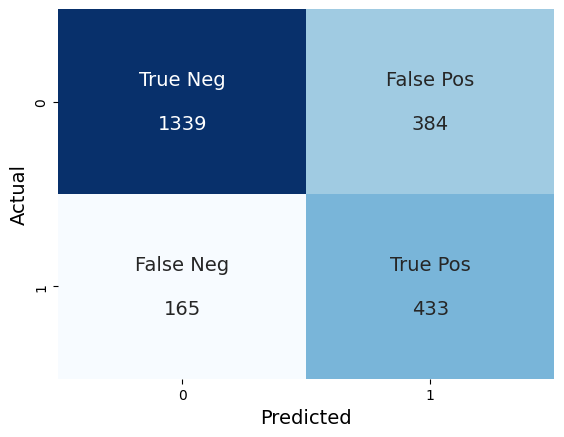



Logistic Regression Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.91      0.87      1723
           1       0.66      0.52      0.58       598

    accuracy                           0.81      2321
   macro avg       0.75      0.71      0.73      2321
weighted avg       0.80      0.81      0.80      2321



In [ ]:
# Create a confusion matrix
conf_matrix_lr = confusion_matrix(y_true=y_test, y_pred=predictions_nb)

#HeatMap of the confusion matrix

# Create the heatmap with custom labels
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix_lr.flatten()]

labels = [f"{v1}\n\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

#Plot the heatmap
sns.heatmap(conf_matrix_lr, annot=labels, annot_kws={"fontsize": 14},
            fmt='', cmap='Blues', cbar=False, vmin=200,vmax=700)

# Set x and y labels
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)

# Show the plot
plt.show()

print('\n\nLogistic Regression Classification Report:\n\n',classification_report(y_test, predictions_lr))

With an overall accuracy of 80.70%, the Logistic Regression model very accurately predicts the negative class which refers to the customers who remain with the telecom company. However, like other models earlier, the positive class (Churn) is predicted with a mediocre accuracy. There can be several reasons for that.
* The overall distribution of Churn is around 3:1 where 75% of customers stay wiith the company while 25% decide to leave. This creates a lack of data relating to customers who actually churn. Therefore, the model has a weak performance in predicting churn.
* The variables used to predict the churn are not very independent. For example, the online services used by the customers depend on the fact whether the customer uses internet service from the company or not. Also, the total charges depend upon the monthly charges and the tenure variables. This means that there are many features which are co-dependent or co-linear which creates a challenge for the Logistic Regression model as discussed in the assumptions above.
* Moreover, the overall sample size of the dataset is not very large. A larger dataset would result in a better performance of the LR model.
* There might be some outliers in the data which are not really outliers but due to their extreme values, they affect the performance of the model. For example, there are some customers who have been with the company for a very long time and their total charges and tenure values are very large but can not be categorised as extreme outliers.

Let's also have a look at the feature importance which indictaes which features have a higher impact on the prediction of the model. These features are potential factors to improve if the company wants to retain more customers. The company can also flag customers who are likely to churn based on these factors and offer them better deals to keep them.

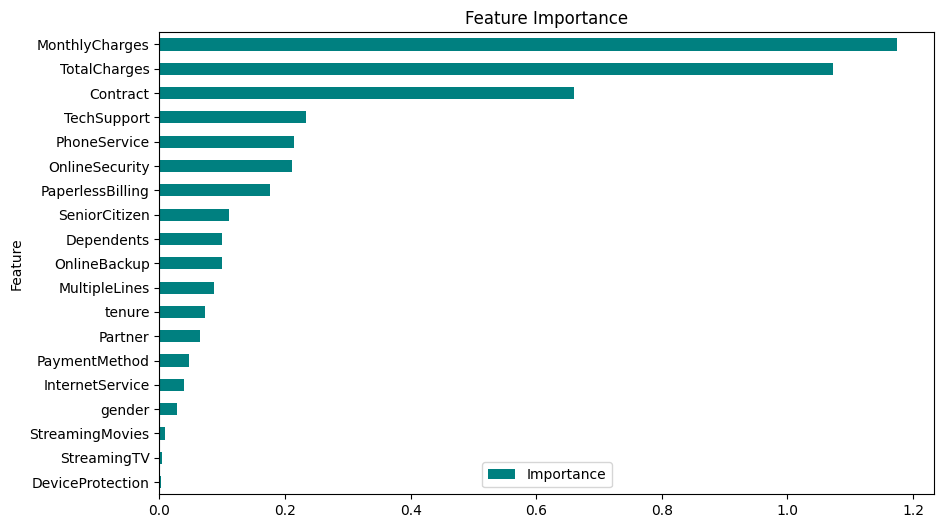

In [ ]:
coefficients = churn_classifier_lr.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

#plotting bar chart for feature importance
ax = feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6), color='teal')
ax.set_title('Feature Importance')
ax.legend(loc='lower center')  # Change the position of the legend

plt.show()


The plot tells a very important story. It indicates that Monthly Charges, Total Charges and Contract type are important features to consider. Customers who exhibit a set pattern of these three variables combined have a higher chance of churn. The company can use this information to tailor their deals for such customers and review their contract types or payment plans etc.

This chart is also intuitive if you think about it from a customer's perpspective. If you are paying a higher rate, and your contract type is monthly, you might be tempted to leave for a better offer elsewhere. Whereas, if you have a good deal with the existing company and your contract is yearly, you might decide to stay.

Looking at this information, we can also state that the Logistic Regression model is using the right features to make reasonable predictions and the model can be trusted to forecast customer churn in the future.

##**Concluding Remarks**
After importing, cleaning and performing exploratory data analysis, the customer churn dataset for a fictional telco company was used to train and implement various machine learning models to classify customer churn.

All the implemented models such as Naive-Bayes, Decision Tree, Random Forest & Logistic Regression, offer reasonably good results; however, logistic regression classifier outperforms others with an accuracy of 80.70 %.

Upon validation, all the models score relatively high for predicting customers who stay, while scoring low for predicting customers who leave the company. The reasons for this variation can be related to the facts that the sample size is not very large, the fraction of labels for churn in the data is very less (only 25% churn), the predictor variables are not highly independent of each other, and there might be certain outliers or extreme values affecting the predictions.

To deal with such challenges, following measures can be undertaken:
* A more thorough removal of outliers can be performed even at the cost of sample size
* A larger dataset can be used to increase the sample size overall as well as increasing the churn label ratio
* Certain feature engineering steps such as dimensionality reduction or principal component analysis can be performed to reduce redundant data and multicolinearlity of the features with respect to each other
* Variables can be transformed to provide better information to the model such as normalization or standardization

In short, it all boils down to the expertise in dealing with feature engineering and selection which drives the model performance. But above all, the root cause is the quality of the data itself. The healthier the data, the better the predictions.

##**References**
* Amaresan, S. (2021) What is customer churn? [definition], HubSpot Blog. Available at: https://blog.hubspot.com/service/what-is-customer-churn (Accessed: 02 January 2024).
* Bento, C. (2021) Decision tree classifier explained in real-life: Picking a vacation destination, Medium. Available at: https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575 (Accessed: 03 January 2024).
* Brown, S. (2021) Machine Learning, explained, MIT Sloan. Available at: https://mitsloan.mit.edu/ideas-made-to-matter/machine-learning-explained (Accessed: 03 January 2024).
* Brownlee, J. (2020) 4 types of classification tasks in machine learning, MachineLearningMastery.com. Available at: https://machinelearningmastery.com/types-of-classification-in-machine-learning/ (Accessed: 03 January 2024).
* Martins, C. (2023) Gaussian naive Bayes explained with Scikit-Learn, Built In. Available at: https://builtin.com/artificial-intelligence/gaussian-naive-bayes (Accessed: 03 January 2024).
* Meltzer, R. (2023) What is Random Forest?, CareerFoundry. Available at: https://careerfoundry.com/en/blog/data-analytics/what-is-random-forest/ (Accessed: 03 January 2024).
* Kanade, V. (2022) Logistic regression: Equation, assumptions, types, and best practices, Spiceworks. Available at: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/ (Accessed: 03 January 2024).